In [2]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Fuerza a la libreta a ocupar toda la pantalla
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Modifica el tamaño de la fuente de la libreta

import warnings
warnings.filterwarnings('ignore') # Los warnings no aparecen en la libreta

# **0. Importar librerías**

In [3]:
!pip install ydata-profiling

In [4]:
# importar librerías
import numpy as np
import pandas as pd
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

%matplotlib inline

# **1. Carga de datos**

Llamamos `cars` al dataframe

In [5]:
#Cargamos el dataset
dataframe = pd.read_csv("elferspot_porsche911.csv",sep=',')
# Lo guardamos en un dataframe
cars = pd.DataFrame(dataframe)

Comprobamos que se ha cargado correctamente

In [6]:
cars


,url,title,price_amount,price_currency,brand,model,year,mileage_km,fuel,transmission,...,specs_raw.Matching numbers:,specs_raw.Vehicle inspection:,specs_raw.Number of vehicle owners:,specs_raw.Seat pattern:,specs_raw.Configuration:,specs_raw.Paint-to-Sample (PTS):,specs_raw.Vehicle inspection valid until:,specs_raw.Secondary interior color:,specs_raw.Consumption:,specs_raw.CO2 emissions:
0,https://www.elferspot.com/en/car/porsche-356-a...,Porsche 356 A 1600 Super Speedster,445000,EUR,NaN,356 A 1600 Super Speedster,1957,69739.0,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.elferspot.com/en/car/porsche-356-b...,Porsche 356 B 1600 Super 90,200000250000,USD,NaN,356 B 1600 Super 90,1963,NaN,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.elferspot.com/en/car/porsche-356-o...,Porsche 356 Outlaw,110000,EUR,NaN,356 Outlaw,1963,71955.0,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.elferspot.com/en/car/porsche-356-p...,Porsche 356 Pre-A 1100,950000,EUR,NaN,356 Pre-A 1100,1951,10.0,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.elferspot.com/en/car/porsche-356-p...,Porsche 356 Pre-A 1500,324900,EUR,NaN,356 Pre-A 1500,1952,54300.0,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,https://www.elferspot.com/en/car/porsche-993-c...,Porsche 993 Carrera,169500,EUR,NaN,993 Carrera,1996,9840.0,Gasoline,Manual,...,yes,NaN,1.0,NaN,ABS Airbag Air conditioning Servo steering,NaN,NaN,NaN,NaN,NaN
4080,https://www.elferspot.com/en/car/porsche-993-c...,Porsche 993 Targa,9649794136020250423249649794136020250423249649...,EUR,NaN,993 Carrera,1997,88000.0,Gasoline,Automatic,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4081,https://www.elferspot.com/en/car/porsche-997-2...,Porsche 997.2 Carrera 4 GTS,9649794136020250423249649794136020250423249649...,EUR,NaN,997.2 Carrera 4 GTS,2012,42000.0,Gasoline,PDK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4082,https://www.elferspot.com/en/car/porsche-997-2...,Porsche 997.2 Carrera GTS,9649794136020250423249649794136020250423249649...,EUR,NaN,997.2 Carrera GTS,2011,33000.0,Gasoline,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2. Primera limpieza de los datos**

In [7]:
cars.drop(['url', 'title', 'brand', 'specs_raw.Vehicle inspection:',
       'specs_raw.Number of vehicle owners:', 'specs_raw.Seat pattern:',
       'specs_raw.Configuration:', 'specs_raw.Paint-to-Sample (PTS):',
       'specs_raw.Vehicle inspection valid until:',
       'specs_raw.Secondary interior color:', 'specs_raw.Consumption:',
       'specs_raw.CO2 emissions:', 'location', 'images', 'description','specs_raw.Interior color:','specs_raw.Exterior color:','specs_raw.VIN:', 'specs_raw.Condition:',
       'specs_raw.Initial registration date:',
       'specs_raw.Country of first delivery:', 'specs_raw.Registered:','specs_raw.Car location:','specs_raw.Manufacturer color code (exterior):','specs_raw.Interior material:','specs_raw.Year of construction:',
       'specs_raw.Model:','specs_raw.Mileage:', 'specs_raw.Power:','specs_raw.Steering:'],axis=1, inplace=True)

In [8]:
cars.drop('specs_raw.Body:', axis = 1, inplace = True)

In [9]:
cars.drop(['specs_raw.New / used:', 'specs_raw.Ready to drive:', 'fuel'], axis = 1, inplace = True)

In [10]:
cars.drop(['specs_raw.Transmission:','specs_raw.Fuel:', 'specs_raw.Series:'], axis = 1, inplace=True)

In [11]:
cars.columns

Index(['price_amount', 'price_currency', 'model', 'year', 'mileage_km',
       'transmission', 'power_hp', 'specs_raw.Cylinder capacity:',
       'specs_raw.Drive:', 'specs_raw.Matching numbers:'],
      dtype='object')

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_amount                  4078 non-null   object 
 1   price_currency                4084 non-null   object 
 2   model                         4084 non-null   object 
 3   year                          4084 non-null   int64  
 4   mileage_km                    3884 non-null   float64
 5   transmission                  4084 non-null   object 
 6   power_hp                      3933 non-null   float64
 7   specs_raw.Cylinder capacity:  3995 non-null   object 
 8   specs_raw.Drive:              4084 non-null   object 
 9   specs_raw.Matching numbers:   1704 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 319.2+ KB


### Matching numbers

In [13]:
cars['specs_raw.Matching numbers:'] = cars['specs_raw.Matching numbers:'].fillna(0)
cars['specs_raw.Matching numbers:'] = cars['specs_raw.Matching numbers:'].replace('yes', 1)
cars['specs_raw.Matching numbers:'] = cars['specs_raw.Matching numbers:'].astype(int)

### Price amount

In [14]:
cars = cars[cars['price_amount'].astype(str).str.len() <= 12]

In [15]:
cars = cars.dropna(subset=['price_amount'])
cars['price_amount'] = cars['price_amount'].astype(int)

#### Limpieza

In [16]:
cars.describe()

,price_amount,year,mileage_km,power_hp,specs_raw.Matching numbers:
count,3.418000e+03,3418.000000,3312.000000,3326.000000,3418.000000
mean,2.224246e+09,1999.865126,61203.774155,344.919723,0.415740
std,2.463930e+10,19.641511,59130.470748,145.489838,0.492921
min,5.200000e+01,1951.000000,1.000000,14.000000,0.000000
25%,7.991100e+04,1986.000000,11156.500000,240.000000,0.000000
50%,1.269000e+05,2004.000000,46935.000000,350.000000,0.000000
75%,2.000000e+05,2018.000000,94554.750000,450.000000,1.000000
max,6.500008e+11,2026.000000,470000.000000,1034.000000,1.000000


In [17]:
cars = cars[cars['price_amount'] <= 500000]

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3247 entries, 0 to 4083
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_amount                  3247 non-null   int64  
 1   price_currency                3247 non-null   object 
 2   model                         3247 non-null   object 
 3   year                          3247 non-null   int64  
 4   mileage_km                    3165 non-null   float64
 5   transmission                  3247 non-null   object 
 6   power_hp                      3162 non-null   float64
 7   specs_raw.Cylinder capacity:  3206 non-null   object 
 8   specs_raw.Drive:              3247 non-null   object 
 9   specs_raw.Matching numbers:   3247 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 279.0+ KB


In [19]:
# Tipos de cambio aproximados (octubre 2025)
exchange_rates = {
    'EUR': 1.00,   # base
    'USD': 0.93,   # 1 USD = 0.93 EUR
    'GBP': 1.15,   # 1 GBP = 1.15 EUR
    'CHF': 1.03    # 1 CHF = 1.03 EUR
}

# Crea una nueva columna con el precio en euros
cars['price_eur'] = cars.apply(
    lambda row: row['price_amount'] * exchange_rates.get(row['price_currency'], np.nan),
    axis=1
)


cars = cars.drop(columns=['price_amount', 'price_currency'])

### Modelo de coche - Simplificación

In [20]:
cars['model'].unique()

array(['356 A 1600 Super Speedster', '356 Outlaw', '356 Pre-A 1500',
       '911 (F-Model)', '911 Backdate', '911 Carrera 3.2', '911 E',
       '911 Modified', '911 S (F-Model)', '911 SC (US)', '914 2.0',
       '914-6 GT Tribute', '964 Carrera 2', '964 Carrera RS',
       '968 Club Sport', '987 Boxster S', '987 Cayman',
       '991.2 Carrera 4 GTS', '991.2 Carrera 4S', '991 GT3 RS',
       '992 Carrera S', '992 GT3 RS', '992 Turbo S', '993 Carrera',
       '993 Turbo', '997.2 Carrera', '997.2 Turbo', '997 Carrera',
       '997.2 Carrera 4S', '997 GT3 RS', '997 Turbo',
       'Taycan 4S Cross Turismo', '718 Boxster', '718 Boxster GTS',
       '718 Cayman GT4', '718 Cayman GTS 4.0', '911 SC', '911 T',
       '911 Turbo 3.3 (US)', '912', '964 Carrera 4',
       '964 Carrera RS America', '987 Cayman S', '991.2 GT3 RS',
       '991 GT3', '991 GT3 Touring', '992 Carrera', '992 Carrera T',
       '992 GT3 Touring', '992 Sport Classic', '992 Turbo',
       '992 Turbo 50 Jahre', '993 Carrera 4

In [21]:
import re
import pandas as pd

def simplifica_modelo(nombre):
    if not isinstance(nombre, str):
        return "Other"
    nombre = nombre.strip()

    # Familias principales por palabra clave
    familias = {
        "356": "356",
        "911": "911",
        "992": "911",
        "991": "911",
        "997": "911",
        "996": "911",
        "993": "911",
        "964": "911",
        "930": "911",
        "901": "911",
        "718": "718",
        "982": "718",
        "981": "Boxster/Cayman",
        "987": "Boxster/Cayman",
        "986": "Boxster/Cayman",
        "944": "944",
        "968": "968",
        "928": "928",
        "912": "912",
        "914": "914",
        "918": "918",
        "959": "959",
        "Taycan": "Taycan",
        "Panamera": "Panamera",
        "Carrera GT": "Carrera GT",
        "Macan": "Macan",
        "Cayenne": "Cayenne"
    }

    for clave, familia in familias.items():
        if clave in nombre:
            return familia
    return "Other"

palabras_clave = ["Turbo", "Targa", "Speedster", "Cabriolet", "Spyder",
                  "GT3", "GT2", "RS", "Cup", "Outlaw", "Replica"]

cars['model_family'] = cars['model'].apply(simplifica_modelo)

In [22]:
cars.drop(['model'], axis = 1, inplace = True)

# **3. Más limpieza**

## 3.1 Arreglar datos

## .1.1 Cylinder Capacity

In [23]:
import pandas as pd
import numpy as np
import re

def limpiar_cilindrada(valor):

    if pd.isna(valor):
        return np.nan

    s = str(valor).strip()
    # Extrae el primer número (con posibles comas/puntos/negativos)
    match = re.search(r'-?[\d.,]+', s)
    if not match:
        return np.nan

    num = match.group(0)
    # Quita signos negativos y espacios
    num = num.replace('-', '').replace(' ', '')

    # Si tiene coma y punto, tomamos la coma como separador de miles → quítala
    if ',' in num and '.' in num:
        num = num.replace(',', '')
    # Si tiene solo coma, la tratamos como punto decimal
    elif ',' in num:
        num = num.replace(',', '.')

    try:
        n = float(num)
    except:
        return np.nan

    # Si el número parece en centímetros cúbicos (ej. 3600) lo paso a litros
    if n > 100:
        n = n / 1000

    # Redondea a un decimal
    return round(n, 1)

# Aplico al DataFrame
cars['specs_raw.Cylinder capacity:'] = cars['specs_raw.Cylinder capacity:'].apply(limpiar_cilindrada)
cars.rename(columns={'specs_raw.Cylinder capacity:': 'cylinder_capacity'}, inplace=True)

In [24]:
cars.head()

,year,mileage_km,transmission,power_hp,cylinder_capacity,specs_raw.Drive:,specs_raw.Matching numbers:,price_eur,model_family
0,1957,69739.0,Manual,75.0,1.6,Rear drive,0,445000.0,356
2,1963,71955.0,Manual,NaN,1.6,Rear drive,0,110000.0,356
4,1952,54300.0,Manual,55.0,1.5,Rear drive,0,324900.0,356
5,1965,70.0,Manual,130.0,2.0,Rear drive,1,291911.0,911
6,1966,6500.0,Manual,180.0,2.0,Rear drive,1,183900.0,911


In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3247 entries, 0 to 4083
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         3247 non-null   int64  
 1   mileage_km                   3165 non-null   float64
 2   transmission                 3247 non-null   object 
 3   power_hp                     3162 non-null   float64
 4   cylinder_capacity            3206 non-null   float64
 5   specs_raw.Drive:             3247 non-null   object 
 6   specs_raw.Matching numbers:  3247 non-null   int64  
 7   price_eur                    3247 non-null   float64
 8   model_family                 3247 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 253.7+ KB


## 3.1.2 Model Family

Me quedo solo con los Porsches que empiezan por 9. Es decir, Porsches carrera

In [26]:
cars = cars[cars['model_family'].str.startswith('9')]
cars.drop(['model_family'], axis=1, inplace=True)

## 3.1.3 OHE

In [27]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Crear y configurar el encoder
OHE = OneHotEncoder(sparse_output=False, drop='first')

# Columnas a codificar
cols = ['specs_raw.Drive:', 'transmission']

# Ajustar y transformar solo esas columnas
ohe_array = OHE.fit_transform(cars[cols])

# Crear un DataFrame con las columnas codificadas
ohe_df = pd.DataFrame(ohe_array, columns=OHE.get_feature_names_out(cols), index=cars.index)

# Concatenar las nuevas columnas con el resto del DataFrame
cars = pd.concat([cars.drop(columns=cols), ohe_df], axis=1)

## 3.2 Quitar Outliers

# **4. visualización final de los datos**

In [28]:
pp.ProfileReport(cars).to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:01<00:00,  8.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
cars.dropna(inplace=True)

<Axes: >

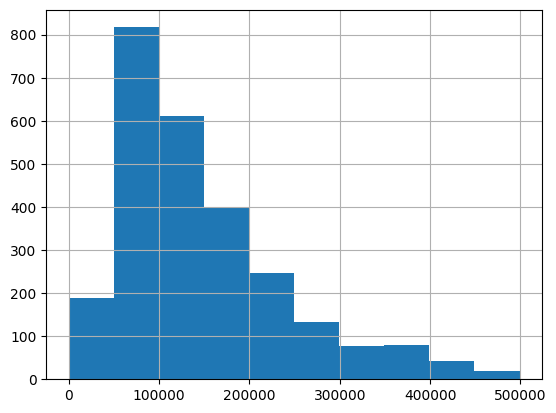

In [30]:
cars['price_eur'].hist()

In [31]:
cars.describe()

,year,mileage_km,power_hp,cylinder_capacity,specs_raw.Matching numbers:,price_eur,specs_raw.Drive:_Rear drive,transmission_Manual,transmission_PDK
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000
mean,2000.668197,66779.156908,350.354382,3.377114,0.438576,147519.906338,0.736701,0.588213,0.329124
std,17.510392,60640.155029,133.940591,0.597721,0.496308,92468.086700,0.440507,0.492251,0.469985
min,1965.000000,1.000000,80.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000
25%,1988.000000,15000.000000,250.000000,3.000000,0.000000,79900.000000,0.000000,0.000000,0.000000
50%,2004.000000,53000.000000,355.000000,3.600000,0.000000,121991.000000,1.000000,1.000000,0.000000
75%,2016.000000,100000.000000,450.000000,3.800000,1.000000,190281.000000,1.000000,1.000000,1.000000
max,2026.000000,470000.000000,1000.000000,5.400000,1.000000,499000.000000,1.000000,1.000000,1.000000


In [32]:
cars = cars[cars['price_eur'] > 40000]
cars = cars[cars['price_eur'] < 220000]

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 6 to 4083
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         2051 non-null   int64  
 1   mileage_km                   2051 non-null   float64
 2   power_hp                     2051 non-null   float64
 3   cylinder_capacity            2051 non-null   float64
 4   specs_raw.Matching numbers:  2051 non-null   int64  
 5   price_eur                    2051 non-null   float64
 6   specs_raw.Drive:_Rear drive  2051 non-null   float64
 7   transmission_Manual          2051 non-null   float64
 8   transmission_PDK             2051 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 160.2 KB


# **5. Train/ Test**

In [34]:
cars.to_csv('cars_limpio.csv', index=False)

In [35]:
# Separar el dataset en dos subdatasets train y test y hacerlo replicable
train, test = train_test_split(cars, train_size = 0.8, random_state = 1234)

In [36]:
X_train = train.drop('price_eur', axis=1)
y_train = train['price_eur']
X_test = test.drop('price_eur', axis=1)
y_test = test['price_eur']

# **6. Prueba de modelos**

## Regresión Lineal

In [37]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Definir el pipeline con estandarización
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Crear un scorer para calcular el MSE (negativo, porque sklearn maximiza por defecto)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar validación cruzada y calcular el MSE y R2
scores = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring={'mse': mse_scorer, 'r2': 'r2'}
)

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE: {rmse}")

RMSE: 35489.287563012665


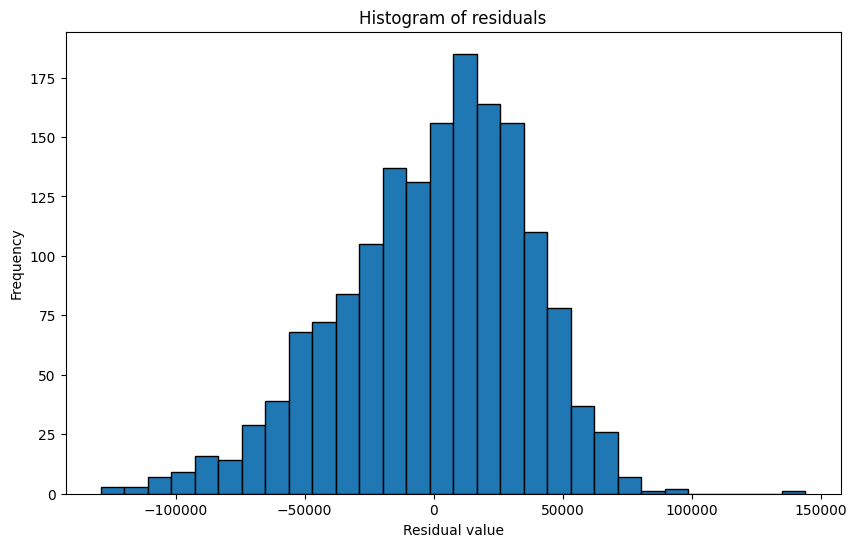

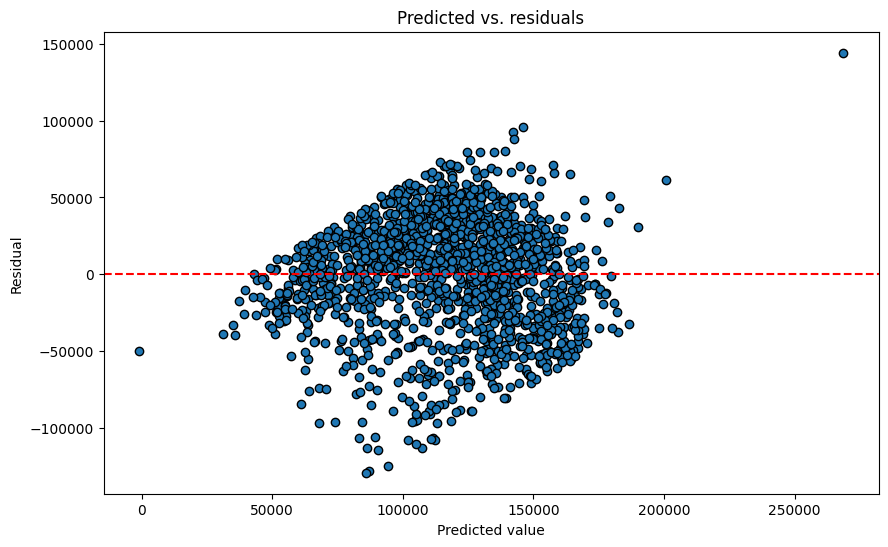

In [38]:
# Calcular residuos
res = y_train_pred - y_train

# Crear histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Frequency')
plt.show()

# Crear scatter plot de predicidos frente a residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res, edgecolor='black')
plt.title('Predicted vs. residuals')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')  # Añadir linea horizontal en cero
plt.show()

## Random Forest

Random Search:



```
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados:
{'model__bootstrap': True, 'model__max_depth': 17, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 8, 'model__n_estimators': 720}
RMSE (test): 25067.94
RMSE medio (CV): 26507.46 ± 1214.98
```



In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Definir el pipeline con estandarización
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Crear un scorer para calcular el MSE (negativo, porque sklearn maximiza por defecto)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar validación cruzada y calcular el MSE y R2
scores = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring={'mse': mse_scorer, 'r2': 'r2'}
)

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE: {rmse}")

RMSE: 25041.23403014155


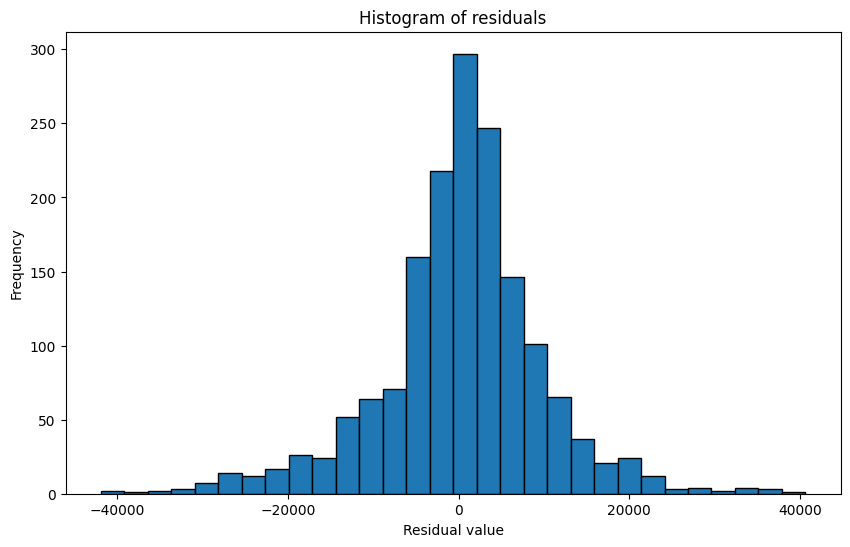

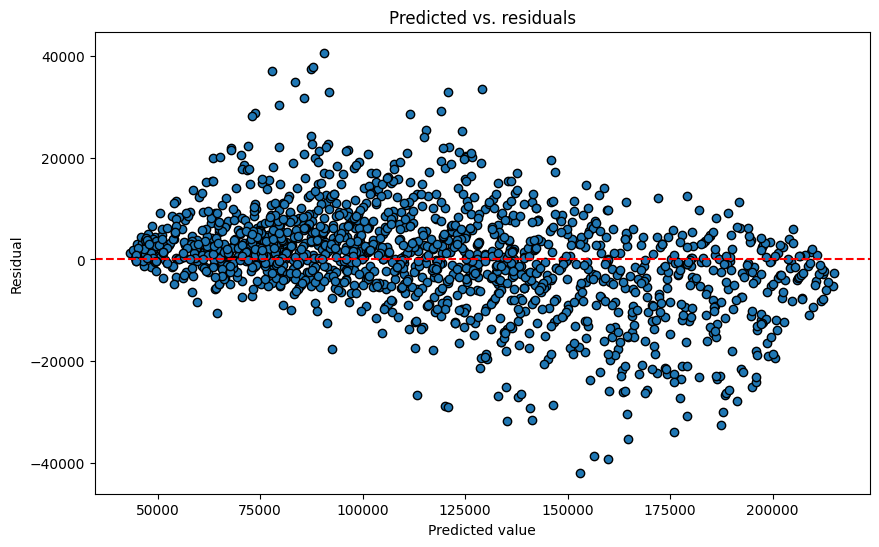

In [40]:
# Calcular residuos
res = y_train_pred - y_train

# Crear histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Frequency')
plt.show()

# Crear scatter plot de predicidos frente a residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res, edgecolor='black')
plt.title('Predicted vs. residuals')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')  # Añadir linea horizontal en cero
plt.show()

## Prueba de muchos códigos:

In [41]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# -----------------------------------------------------
# Modelo XGBoost regularizado (versión compatible con XGBoost >= 2.0)
# -----------------------------------------------------
xgb_reg = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,      # suaviza la contribución de cada árbol
    max_depth=4,             # menos profundidad = menos overfitting
    min_child_weight=10,     # aumenta mínimo de observaciones por hoja
    subsample=0.7,           # usa 70 % de los datos por árbol
    colsample_bytree=0.7,    # usa 70 % de las features por árbol
    reg_lambda=5.0,          # L2 regularization
    reg_alpha=1.0,           # L1 regularization
    gamma=0.2,               # ganancia mínima para split
    objective='reg:squarederror',
    eval_metric='rmse',
    n_jobs=-1,
    random_state=42,
    tree_method='hist'
)

# Pipeline
pipeline_xgb_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb_reg)
])

# Entrena TODO el pipeline
pipeline_xgb_reg.fit(
    X_train, y_train,
)

# Predicciones
y_train_pred = pipeline_xgb_reg.predict(X_train)
y_test_pred  = pipeline_xgb_reg.predict(X_test)

# Métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo XGBoost regularizado ✅")
print(f"RMSE (train): {rmse_train:.2f}")
print(f"RMSE (test):  {rmse_test:.2f}")

Modelo XGBoost regularizado ✅
RMSE (train): 18661.50
RMSE (test):  24478.90


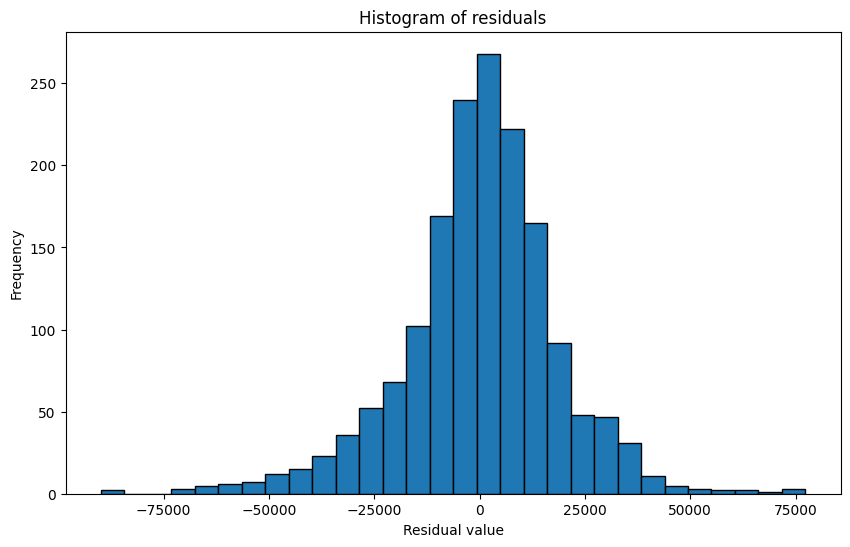

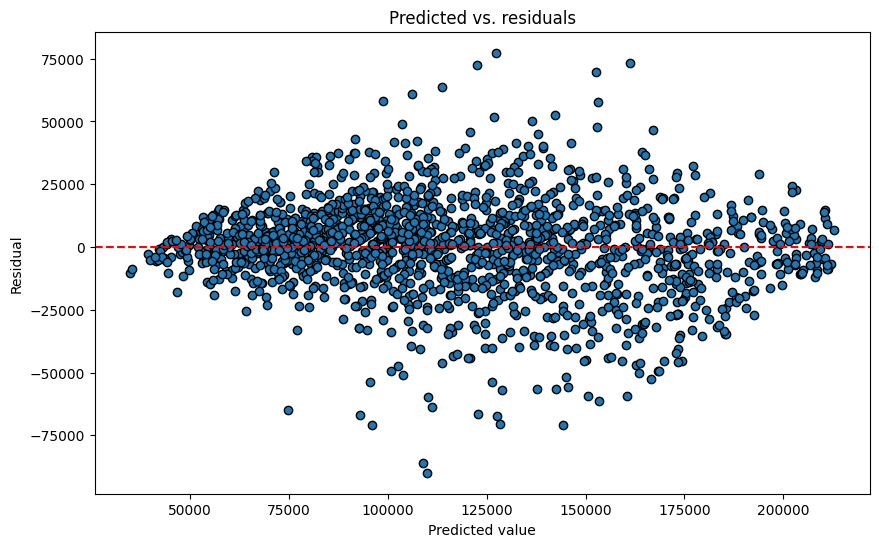

In [42]:
# Calcular residuos
res = y_train_pred - y_train

# Crear histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Frequency')
plt.show()

# Crear scatter plot de predicidos frente a residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res, edgecolor='black')
plt.title('Predicted vs. residuals')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')  # Añadir linea horizontal en cero
plt.show()

## CatBoost

In [43]:
!pip install catboost

In [44]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=1000)

# Pipeline
pipeline_xgb_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Entrena TODO el pipeline
pipeline_xgb_reg.fit(
    X_train, y_train,
)

# Predicciones
y_train_pred = pipeline_xgb_reg.predict(X_train)
y_test_pred  = pipeline_xgb_reg.predict(X_test)

# Métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Modelo XGBoost regularizado ✅")
print(f"RMSE (train): {rmse_train:.2f}")
print(f"RMSE (test):  {rmse_test:.2f}")

Learning rate set to 0.044272
0:	learn: 46439.9117706	total: 48.1ms	remaining: 48s
1:	learn: 45618.2960320	total: 49ms	remaining: 24.5s
2:	learn: 44842.4955192	total: 50ms	remaining: 16.6s
3:	learn: 44137.0780417	total: 50.8ms	remaining: 12.7s
4:	learn: 43551.1970696	total: 51.7ms	remaining: 10.3s
5:	learn: 42819.4920915	total: 52.7ms	remaining: 8.72s
6:	learn: 42145.4948335	total: 53.5ms	remaining: 7.59s
7:	learn: 41510.4385591	total: 54.4ms	remaining: 6.74s
8:	learn: 40849.1549872	total: 55.2ms	remaining: 6.08s
9:	learn: 40280.8267785	total: 56.1ms	remaining: 5.55s
10:	learn: 39704.7063073	total: 56.9ms	remaining: 5.11s
11:	learn: 39268.6679682	total: 57.7ms	remaining: 4.75s
12:	learn: 38841.5273228	total: 58.6ms	remaining: 4.45s
13:	learn: 38343.0434493	total: 59.4ms	remaining: 4.18s
14:	learn: 37896.4920566	total: 60.3ms	remaining: 3.96s
15:	learn: 37430.4864685	total: 61.2ms	remaining: 3.76s
16:	learn: 37095.2061070	total: 62.2ms	remaining: 3.59s
17:	learn: 36672.7999279	total: 63



```
RandomSearch CV CatBoost

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores hiperparámetros encontrados:
   model__bagging_temperature: 0.8331617157060953
   model__border_count: 82
   model__depth: 5
   model__iterations: 1183
   model__l2_leaf_reg: 3.441255222477742
   model__learning_rate: 0.035243656325939586
   model__random_strength: 1.593821097865351

Modelo CatBoost con Random Search
RMSE (train): 18,196.45
RMSE (test):  23,891.11
```



In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# ==========================================================
# MODELO CATBOOST FINAL (HIPERPARÁMETROS ÓPTIMOS)
# ==========================================================
cat_model_best = CatBoostRegressor(
    iterations=1183,
    depth=5,
    learning_rate=0.035243656325939586,
    l2_leaf_reg=3.441255222477742,
    bagging_temperature=0.8331617157060953,
    border_count=82,
    random_strength=1.593821097865351,
    bootstrap_type='Bayesian',
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=0,
    random_state=42
)

# ==========================================================
# PIPELINE COMPLETO
# ==========================================================
pipeline_cat_final = Pipeline([
    ('scaler', StandardScaler()),
    ('model', cat_model_best)
])

# Entrenamiento
pipeline_cat_final.fit(X_train, y_train)

# Predicciones
y_train_pred = pipeline_cat_final.predict(X_train)
y_test_pred  = pipeline_cat_final.predict(X_test)

# ==========================================================
# MÉTRICAS
# ==========================================================
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test, y_test_pred)

print("Modelo CatBoost optimizado (Random Search)")
print(f"RMSE (train): {rmse_train:,.2f}")
print(f"RMSE (test):  {rmse_test:,.2f}")
print(f"R² (train):   {r2_train:.4f}")
print(f"R² (test):    {r2_test:.4f}")

✅ Modelo CatBoost optimizado (Random Search)
RMSE (train): 18,196.45
RMSE (test):  23,891.11
R² (train):   0.8519
R² (test):    0.7389


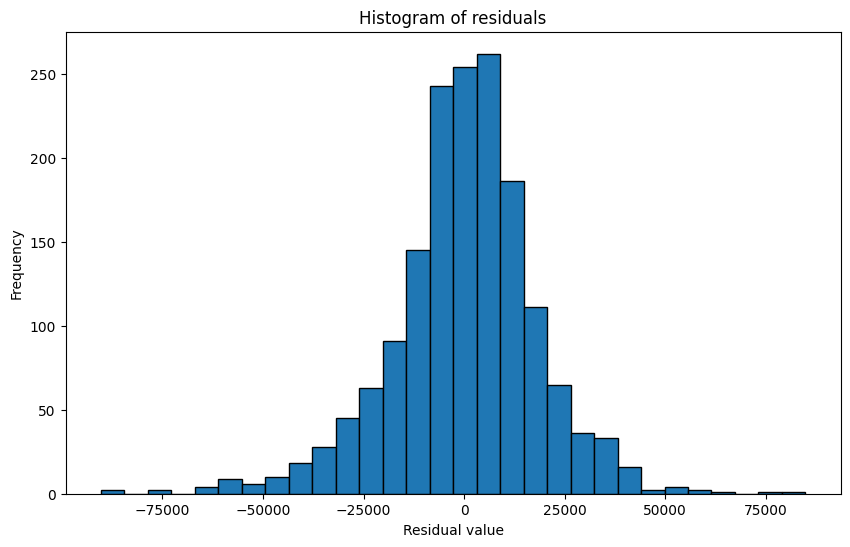

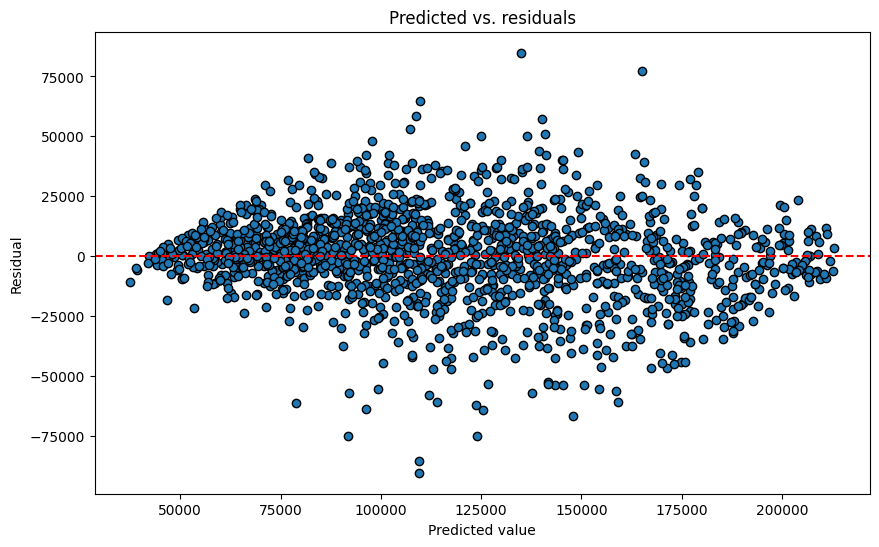

In [49]:
# Calcular residuos
res = y_train_pred - y_train

# Crear histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(res, bins=30, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('Frequency')
plt.show()

# Crear scatter plot de predicidos frente a residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res, edgecolor='black')
plt.title('Predicted vs. residuals')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')  # Añadir linea horizontal en cero
plt.show()